<a href="https://colab.research.google.com/github/20Gustavo05/310barber_BigData/blob/main/310Barber_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
import random as rd

In [3]:
#criando um dataframe de informções gerais
geral_df = pd.read_excel('310barber.nv.xlsx')

#removendo linhas
geral_df = geral_df.drop(1295, axis=0)
geral_df = geral_df.drop(348, axis=0)
geral_df = geral_df.drop(1310, axis=0)
geral_df = geral_df.drop(1318, axis=0)
geral_df = geral_df.drop(1322, axis=0)
geral_df = geral_df.drop(38, axis=0)
geral_df = geral_df.drop(545, axis=0)
geral_df = geral_df.drop(762, axis=0)
geral_df = geral_df.drop(797, axis=0)
display(geral_df)


,Cliente,Valor,Barbeiro,Pagamento,Serviço,Tempo,Data,Mês
0,João Paulo,25,Victor,Dinheiro,Cabelo Giletado+Tesoura,30,2024-04-02,Abril
1,Lamella,25,Victor,Pix,Cabelo Giletado+Tesoura,30,2024-04-02,Abril
2,Cristian,45,Fernando,Pix,Cabelo Enroladinho,45,2024-04-02,Abril
3,Gustavo,20,Fernando,Pix,Cabelo Disfarçado,30,2024-04-02,Abril
4,Vitor Hugo,30,Fernando,Pix,Cabelo Disfarçado+Barba,45,2024-04-02,Abril
...,...,...,...,...,...,...,...,...
1704,Bernardo,20,Fernando,Pix,Cabelo Disfarçado,30,2024-07-31,Julho
1705,André,35,Ygor,Pix,Cabelo Enroladinho,45,2024-07-31,Julho
1706,Antônio,10,Ygor,Dinheiro,Barba(Padrão),15,2024-07-31,Julho
1707,Quelvim,130,Ygor,Pix,Cabelo Enroladinho+Barba+Minoxidil+Pomada,60,2024-07-31,Julho


In [16]:
#criando um dataframe de FDL
fdl_df = pd.read_excel('fdl.xlsx')

#removendo linhas que estejam completamente vázias
fdl_df = fdl_df.dropna(how='all', axis=0)
fdl_df = fdl_df.dropna(how='all', axis=1)
display(fdl_df)

,MESES,FATURAMENTO,TOTAL DESPESAS,TOTAL LUCRO BRUTO,MARGEM DE LUCRO,MÉDIA DIARIA DE CLIENTES
0,Março,12870.0,5100.00,7770.00,0.603730,19
1,Maio,12285.0,6233.29,6051.71,0.492610,16
2,Junho,11727.0,6485.69,5241.31,0.446944,24
3,Julho,12175.0,6459.82,5715.18,0.469419,16
4,Agosto,14317.0,6793.02,7523.98,0.525528,22
5,Setembro,11666.5,7000.00,4666.50,0.399991,17


,Mês,Valor
0,Abril,25
1,Abril,25
2,Abril,45
3,Abril,20
4,Abril,30
...,...,...
1704,Julho,20
1705,Julho,35
1706,Julho,10
1707,Julho,130


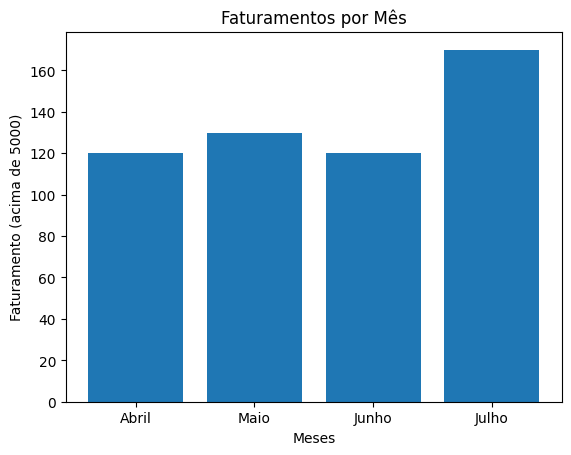

In [18]:
# Data Frame expecifico
bar_df = geral_df[['Mês', 'Valor']]
display(bar_df)

# Criar um gráfico de barra a partir de um data frame
plt.bar(geral_df['Mês'], geral_df['Valor'])
plt.title('Faturamentos por Mês')
plt.xlabel('Meses')
plt.ylabel('Faturamento (acima de 5000)')
plt.show()


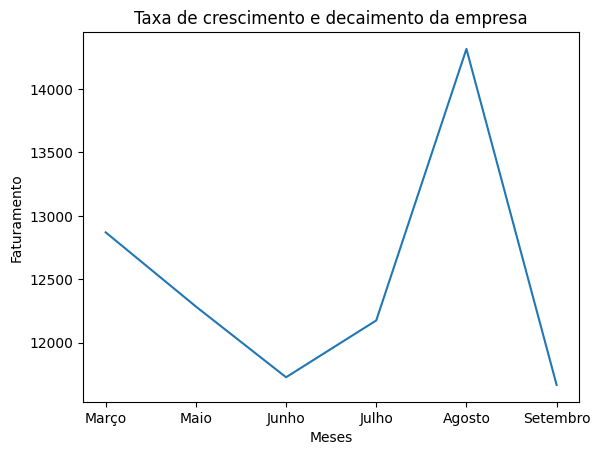

In [6]:
#criando um gráfico de linha para o crescimento da empresa
plt.plot(fdl_df['MESES'], fdl_df['FATURAMENTO'])
plt.title('Taxa de crescimento e decaimento da empresa')
plt.xlabel('Meses')
plt.ylabel('Faturamento')
plt.show()

,Barbeiro,Cliente,Valor
0,Victor,João Paulo,25
1,Victor,Lamella,25
2,Fernando,Cristian,45
3,Fernando,Gustavo,20
4,Fernando,Vitor Hugo,30
...,...,...,...
1704,Fernando,Bernardo,20
1705,Ygor,André,35
1706,Ygor,Antônio,10
1707,Ygor,Quelvim,130


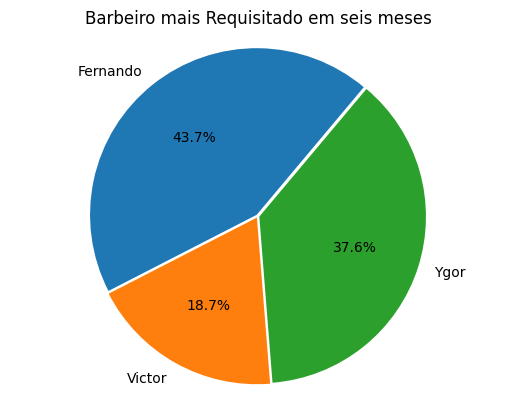

In [19]:
# Data Frame expecifico
grafico_setor = geral_df[['Barbeiro', 'Cliente', 'Valor']]
display(grafico_setor)

# Criando um dataframe com os dados
pie_df = pd.DataFrame(geral_df)
pie_df = pie_df.groupby('Barbeiro')['Valor'].sum()
explode = (0.01, 0.01, 0.01)


# Criando o gráfico de pizza
plt.pie(pie_df.values,
        labels=pie_df.index,
        autopct='%1.1f%%',
        startangle=50,
        explode=explode
)
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.title('Barbeiro mais Requisitado em seis meses')
plt.show()

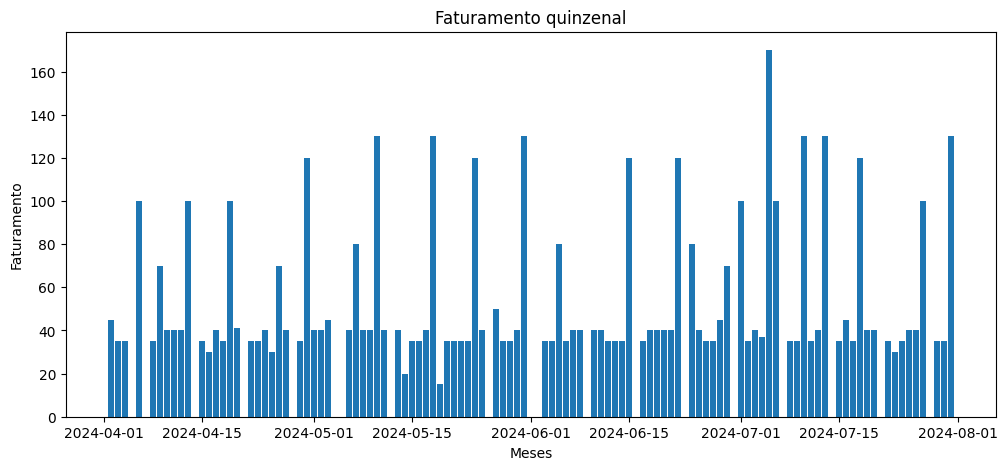

In [14]:
# ampliando o gráfico horizontalmente
plt.figure(figsize=(12, 5))

# gerando um gráfico de barra
plt.bar(geral_df['Data'], geral_df['Valor'])
plt.title('Faturamento quinzenal')
plt.xlabel('Meses')
plt.ylabel('Faturamento')
plt.show()

,Mês,Valor,Pagamento
0,Abril,25,Dinheiro
1,Abril,25,Pix
2,Abril,45,Pix
3,Abril,20,Pix
4,Abril,30,Pix
...,...,...,...
1704,Julho,20,Pix
1705,Julho,35,Pix
1706,Julho,10,Dinheiro
1707,Julho,130,Pix


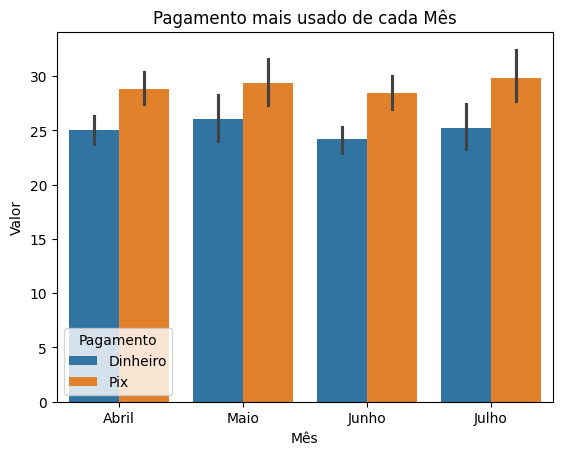

In [10]:
# Data Frame expecifico
barplot1_df = geral_df[['Mês', 'Valor', 'Pagamento']]
display(barplot1_df)

# Creating a grouped bar chart
sns.barplot(data=barplot1_df, x='Mês', y='Valor', hue='Pagamento')
plt.title('Pagamento mais usado de cada Mês')
plt.show()

,Barbeiro,Serviço,count
0,Fernando,Cabelo Disfarçado,176
1,Fernando,Cabelo Enroladinho,119
2,Fernando,Cabelo Maquina+Tesoura,104
3,Fernando,Cabelo Giletado+Tesoura,83
4,Fernando,Cabelo Disfarçado+Barba,72
...,...,...,...
81,Ygor,Cabelo Maquina+Tesoura +Barba+Pomada+Minoxidil,1
82,Ygor,Cabelo Maquina+Tesoura+Barba,1
83,Ygor,Pomada,1
84,Ygor,Pomada Cera Incolor,1


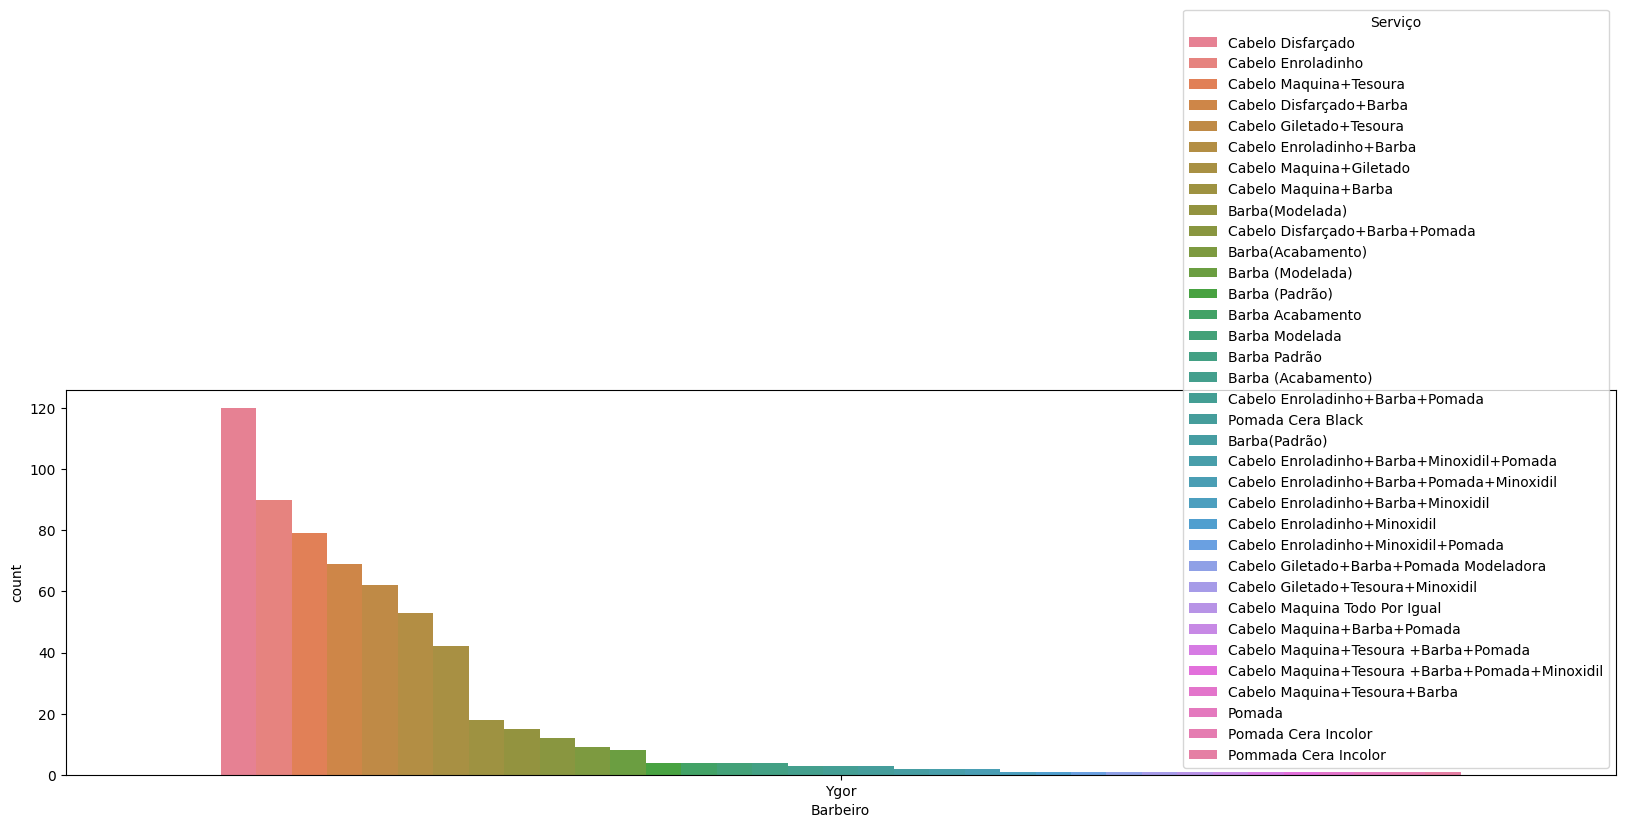

In [8]:
# criando data frame de todos os barbeiros
barbeiros_df = geral_df[['Barbeiro', 'Serviço']]
barbeiros_df = geral_df.groupby('Barbeiro')['Serviço'].value_counts()
barbeiros_df = barbeiros_df.reset_index(name='count')
display(barbeiros_df)

# Criando Data Frame secundario
ygor_df = geral_df[['Barbeiro', 'Serviço']]
ygor_df = geral_df.loc[geral_df['Barbeiro'] == 'Ygor']
ygor_df = ygor_df.groupby('Barbeiro')['Serviço'].value_counts()
ygor_df = ygor_df.reset_index(name='count')

# Criando Gráfico Para Analise
plt.figure(figsize=(20, 5))
sns.barplot(data=ygor_df, x='Barbeiro', y='count', hue='Serviço')
plt.show()

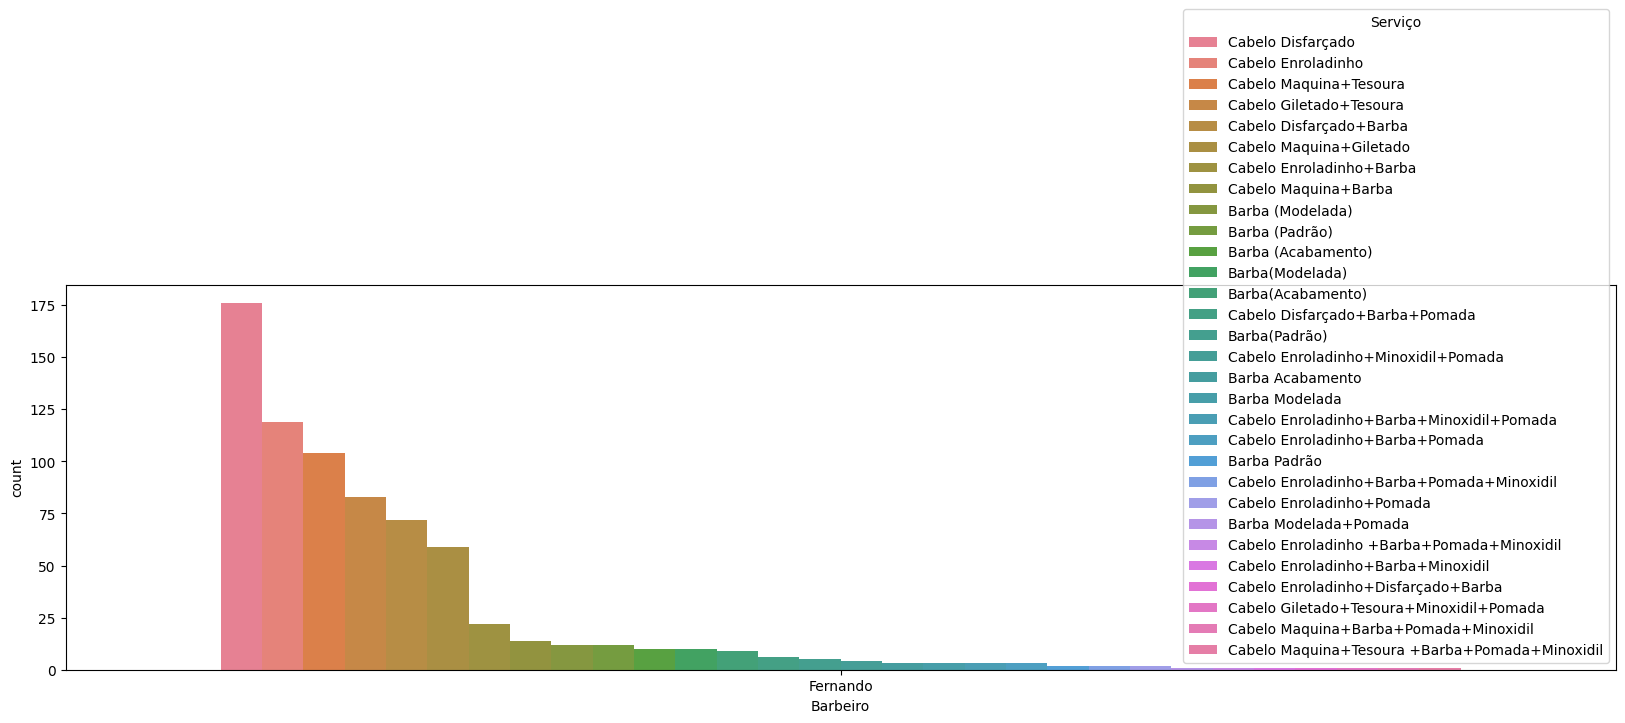

In [27]:
# Criando Data Frame secundario
Fernando_df = geral_df[['Barbeiro', 'Serviço']]
Fernando_df = geral_df.loc[geral_df['Barbeiro'] == 'Fernando']
Fernando_df = Fernando_df.groupby('Barbeiro')['Serviço'].value_counts()
Fernando_df = Fernando_df.reset_index(name='count')

# Criando Gráfico Para Analise
plt.figure(figsize=(20, 5))
sns.barplot(data=Fernando_df, x='Barbeiro', y='count', hue='Serviço')
plt.show()

,Mês,Valor,Barbeiro
0,Abril,25,Victor
1,Abril,25,Victor
2,Abril,45,Fernando
3,Abril,20,Fernando
4,Abril,30,Fernando
...,...,...,...
1704,Julho,20,Fernando
1705,Julho,35,Ygor
1706,Julho,10,Ygor
1707,Julho,130,Ygor


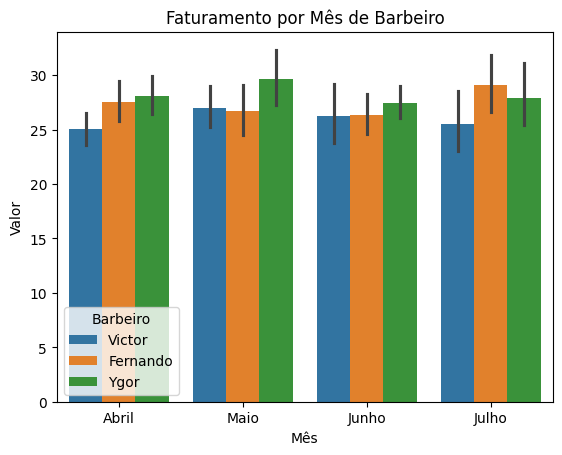

In [ ]:
# Data Frame expecif
barplot2_df = geral_df[['Mês', 'Valor', 'Barbeiro']]
display(barplot2_df)

# Creating a grouped bar chart
sns.barplot(data=geral_df, x='Mês', y='Valor', hue='Barbeiro')
plt.title('Faturamento por Mês de Barbeiro')
plt.show()